# import packages

In [131]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

length of x: torch.Size([400, 1])
length of y: torch.Size([400, 1])


Text(0, 0.5, 'Dependent variable')

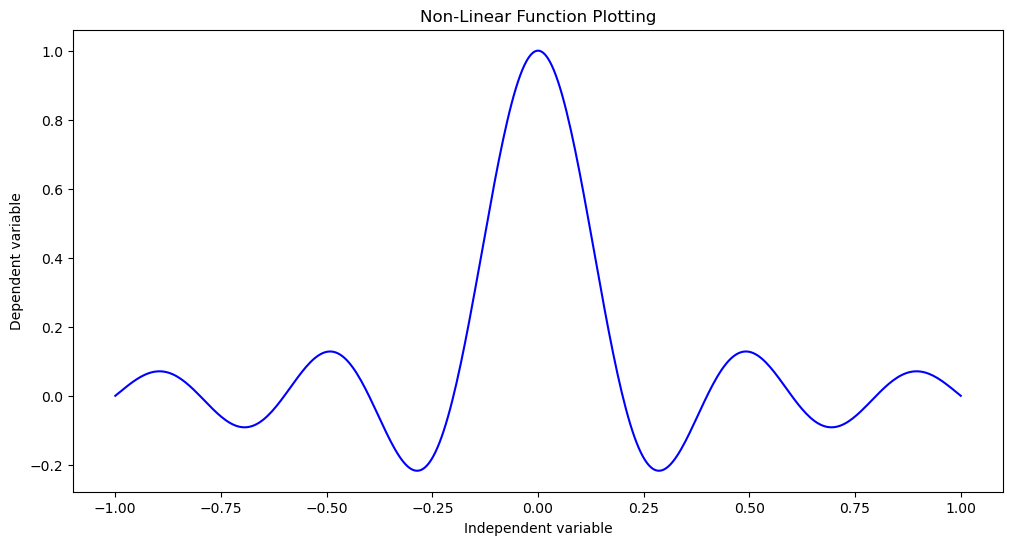

In [132]:
## Function 1  ###
x = torch.unsqueeze(torch.linspace(-1, 1, 400), dim=1)


y = (np.sin(5*np.pi*x))/(5*np.pi*x)

print('length of x:',x.shape)
print('length of y:',y.shape)
plt.figure(figsize=(12,6))
plt.plot(x, y, color = "blue")
plt.title('Non-Linear Function Plotting')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')


In [133]:
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
       # self.hidenlayer8  = nn.Linear(5,1)
        # output layer
        self.output = nn.Linear(5, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        #x = F.relu(self.hiddenlayer8(x))
        x = self.output(x)            
        return x     
        

#defining the model
model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)

#Getting weights & bias
print("\nModel 1 weight and bias before training\n")

for par in model1.state_dict():
    print(par, "\t",model1.state_dict()[par])

Number of parameters in Model 1: 571

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.8542],
        [-0.4699],
        [-0.1183],
        [ 0.3686],
        [-0.6999]])
hiddenlayer1.bias 	 tensor([ 0.5545, -0.9531,  0.1837,  0.8981,  0.2273])
hiddenlayer2.weight 	 tensor([[ 0.1163, -0.0373,  0.1705,  0.4183, -0.4462],
        [-0.3075,  0.0958, -0.2715, -0.4195,  0.2449],
        [ 0.4451, -0.2800, -0.2101,  0.0824,  0.1486],
        [ 0.1198, -0.0162,  0.3001,  0.0447, -0.0859],
        [-0.0878, -0.0362,  0.3112,  0.1896, -0.0678],
        [ 0.0355, -0.0772, -0.2552, -0.3466,  0.2829],
        [ 0.0498,  0.3772,  0.3858,  0.2162, -0.3832],
        [ 0.0809, -0.2299, -0.0170,  0.4330,  0.1480],
        [ 0.0466, -0.4237,  0.3929, -0.3866, -0.4253],
        [-0.3741, -0.1705,  0.4118, -0.3284,  0.0005]])
hiddenlayer2.bias 	 tensor([ 0.4383,  0.1322,  0.0558,  0.2338,  0.0861,  0.2214, -0.2571,  0.2350,
        -0.1289,  0.2648])
hiddenlayer3.weight 	 tensor(

In [134]:
def testing(model,x,y):
    maximum_epoch = 20000
    epoch_array = []
    loss_array = []
    epoch = 0
    not_converged = True
    while not_converged:
        
        # for each x it the modedl predicts
        prediction = model(x)     
        loss = loss_function(prediction, y)
        #clearing gradients for next training, otherwise it provides wrong result
        optimizer.zero_grad()
        # backpropagation for computing gradients
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == maximum_epoch:
                print("Reached to Maximum number of Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [135]:
x = torch.tensor(x, dtype=torch.float32) 
y = torch.tensor(y, dtype=torch.float32)

C:\Users\Jean Michel\AppData\Local\Temp\ipykernel_15956\2067748302.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\Jean Michel\AppData\Local\Temp\ipykernel_15956\2067748302.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [136]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 0.1168
epoch: 200, loss = 0.0868
epoch: 300, loss = 0.0862
epoch: 400, loss = 0.0789
epoch: 500, loss = 0.0096
epoch: 600, loss = 0.0060
epoch: 700, loss = 0.0052
epoch: 800, loss = 0.0047
epoch: 900, loss = 0.0042
epoch: 1000, loss = 0.0037
epoch: 1100, loss = 0.0030
epoch: 1200, loss = 0.0030
epoch: 1300, loss = 0.0029
epoch: 1400, loss = 0.0029
epoch: 1500, loss = 0.0028
epoch: 1600, loss = 0.0028
epoch: 1700, loss = 0.0027
epoch: 1800, loss = 0.0025
epoch: 1900, loss = 0.0022
epoch: 2000, loss = 0.0017
epoch: 2100, loss = 0.0015
epoch: 2200, loss = 0.0014
epoch: 2300, loss = 0.0012
Converged: 0.0009959956


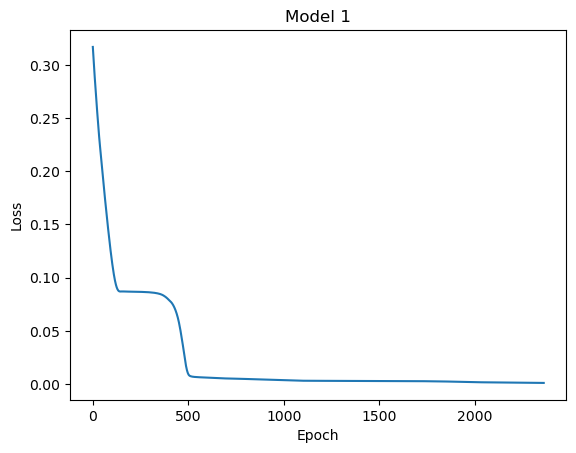

In [137]:
#error vs epoch plot
plt.plot(Model1epoch_array, Model1loss_array)
plt.title('Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

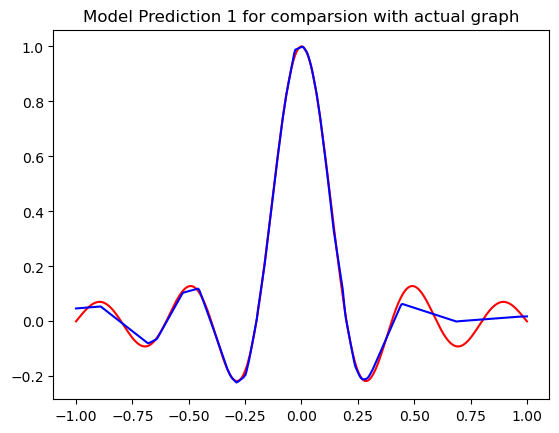

In [138]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1 for comparsion with actual graph')
plt.show()

In [139]:
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
        # output layer
        self.output = nn.Linear(4, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        

        
#defining the model
model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)

#Getting weights & bias
print("\nModel 2 weight and bias before training\n")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572

Model 2 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.5630],
        [ 0.0547],
        [-0.3560],
        [ 0.5265],
        [-0.9210],
        [-0.7472],
        [ 0.5338],
        [-0.2800],
        [ 0.1399],
        [ 0.6032]])
hiddenlayer1.bias 	 tensor([-0.1670,  0.9719, -0.4851, -0.5655, -0.9767, -0.1177,  0.3094,  0.5217,
        -0.8549, -0.7415])
hiddenlayer2.weight 	 tensor([[ 6.5423e-02, -1.8853e-01, -2.7501e-01,  5.3904e-02,  1.0036e-01,
          2.6942e-01,  1.6340e-01, -2.5939e-01, -2.7050e-01, -2.2866e-01],
        [ 2.6837e-01,  1.8095e-01, -3.0197e-01, -1.4307e-01, -1.1724e-01,
          9.8588e-02, -2.5423e-01,  1.0548e-01, -1.8550e-01, -2.2347e-01],
        [-2.8052e-01,  1.1902e-01, -5.2724e-02,  1.0881e-01,  2.5705e-01,
         -1.4735e-01,  2.0251e-01, -2.5462e-01, -2.2553e-01, -3.1378e-02],
        [-3.0839e-01, -2.3594e-01,  2.1115e-01,  1.6589e-01,  8.7673e-02,
         -1.0839e-01,  1.0941e-01, -2.

In [140]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.0687
epoch: 200, loss = 0.0188
epoch: 300, loss = 0.0074
epoch: 400, loss = 0.0045
epoch: 500, loss = 0.0036
epoch: 600, loss = 0.0033
epoch: 700, loss = 0.0032
epoch: 800, loss = 0.0026
epoch: 900, loss = 0.0016
epoch: 1000, loss = 0.0015
epoch: 1100, loss = 0.0015
epoch: 1200, loss = 0.0015
epoch: 1300, loss = 0.0016
epoch: 1400, loss = 0.0026
epoch: 1500, loss = 0.0015
epoch: 1600, loss = 0.0015
epoch: 1700, loss = 0.0015
epoch: 1800, loss = 0.0015
epoch: 1900, loss = 0.0015
epoch: 2000, loss = 0.0015
epoch: 2100, loss = 0.0019
epoch: 2200, loss = 0.0015
epoch: 2300, loss = 0.0015
epoch: 2400, loss = 0.0021
epoch: 2500, loss = 0.0015
epoch: 2600, loss = 0.0015
epoch: 2700, loss = 0.0015
epoch: 2800, loss = 0.0015
epoch: 2900, loss = 0.0015
epoch: 3000, loss = 0.0014
epoch: 3100, loss = 0.0014
epoch: 3200, loss = 0.0014
epoch: 3300, loss = 0.0011
Converged: 0.0009609716


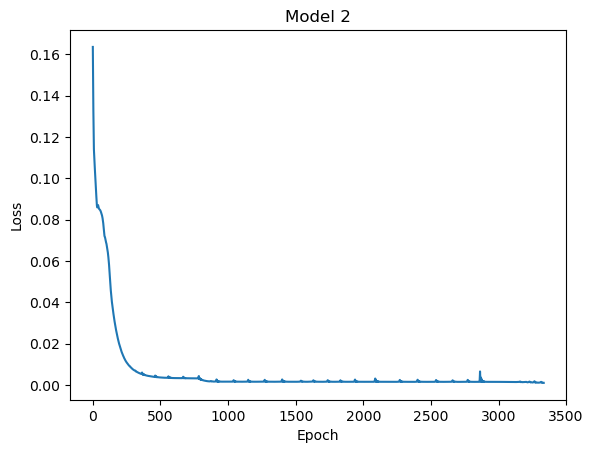

In [141]:
plt.plot(Model2epoch_array, Model2loss_array)
plt.title('Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

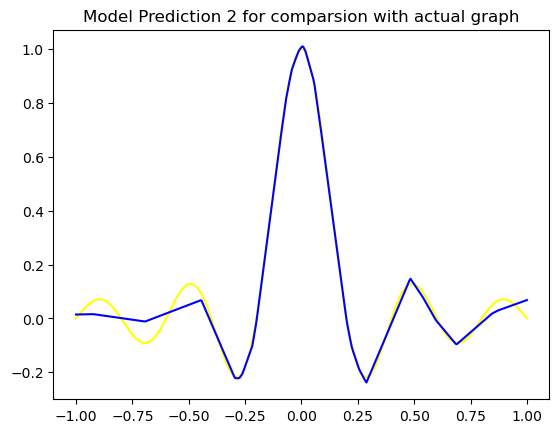

In [142]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="yellow")
#ploting the prediction graph
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 for comparsion with actual graph')
plt.show()

In [143]:
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer = nn.Linear(1, 190)   
       

        # output layer
        self.output = nn.Linear(190, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)
      
    
        return x     
        

#defining the model
model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.0001)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

#Getting weights & bias
print("Model 3 weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3 weight and bias before training
hiddenlayer.weight 	 tensor([[ 0.0117],
        [-0.8158],
        [-0.4723],
        [-0.5931],
        [-0.0021],
        [ 0.8967],
        [ 0.7212],
        [-0.5308],
        [-0.4101],
        [ 0.1878],
        [ 0.3171],
        [ 0.6150],
        [-0.9869],
        [-0.0063],
        [ 0.7198],
        [-0.3088],
        [-0.6123],
        [-0.6218],
        [-0.9896],
        [ 0.2576],
        [-0.2064],
        [-0.2413],
        [ 0.0302],
        [-0.6770],
        [-0.2990],
        [ 0.6740],
        [ 0.5170],
        [-0.3504],
        [ 0.7924],
        [-0.7042],
        [-0.3014],
        [-0.4760],
        [-0.5342],
        [-0.0158],
        [-0.0335],
        [-0.1161],
        [-0.3539],
        [ 0.8538],
        [-0.7369],
        [ 0.4639],
        [-0.9423],
        [-0.4438],
        [ 0.1237],
        [ 0.5617],
        [ 0.0322],
        [ 0.5673],
        [-0.4286],
        [

In [144]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.0680
epoch: 200, loss = 0.0564
epoch: 300, loss = 0.0458
epoch: 400, loss = 0.0359
epoch: 500, loss = 0.0278
epoch: 600, loss = 0.0211
epoch: 700, loss = 0.0160
epoch: 800, loss = 0.0124
epoch: 900, loss = 0.0100
epoch: 1000, loss = 0.0084
epoch: 1100, loss = 0.0075
epoch: 1200, loss = 0.0068
epoch: 1300, loss = 0.0063
epoch: 1400, loss = 0.0060
epoch: 1500, loss = 0.0058
epoch: 1600, loss = 0.0056
epoch: 1700, loss = 0.0055
epoch: 1800, loss = 0.0054
epoch: 1900, loss = 0.0053
epoch: 2000, loss = 0.0052
epoch: 2100, loss = 0.0051
epoch: 2200, loss = 0.0050
epoch: 2300, loss = 0.0049
epoch: 2400, loss = 0.0047
epoch: 2500, loss = 0.0045
epoch: 2600, loss = 0.0044
epoch: 2700, loss = 0.0042
epoch: 2800, loss = 0.0040
epoch: 2900, loss = 0.0038
epoch: 3000, loss = 0.0036
epoch: 3100, loss = 0.0034
epoch: 3200, loss = 0.0031
epoch: 3300, loss = 0.0029
epoch: 3400, loss = 0.0027
epoch: 3500, loss = 0.0026
epoch: 3600, loss = 0.0024
epoch: 3700, loss = 0.0022
epoch: 380

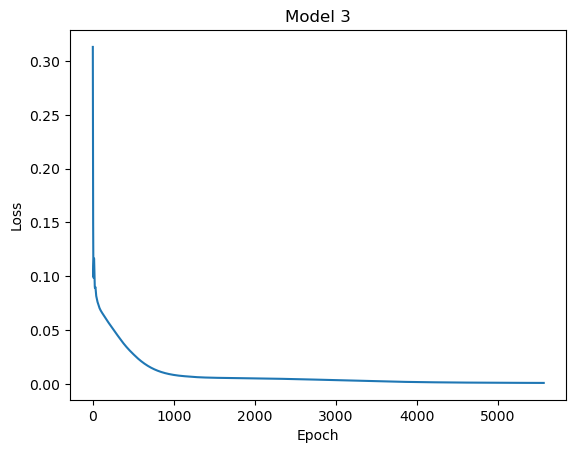

In [145]:
#error vs epoch plot
plt.plot(Model3epoch_array, Model3loss_array)
plt.title('Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

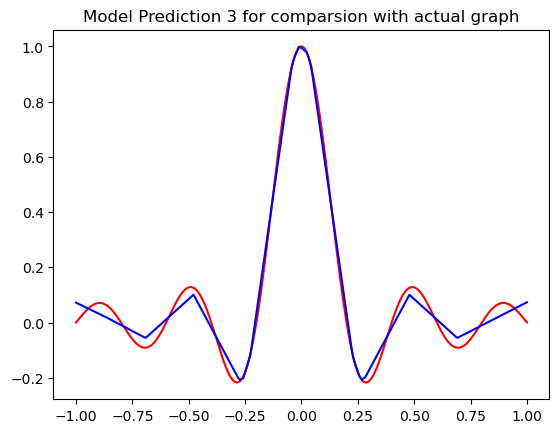

In [147]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Model Prediction 3 for comparsion with actual graph')
plt.show()

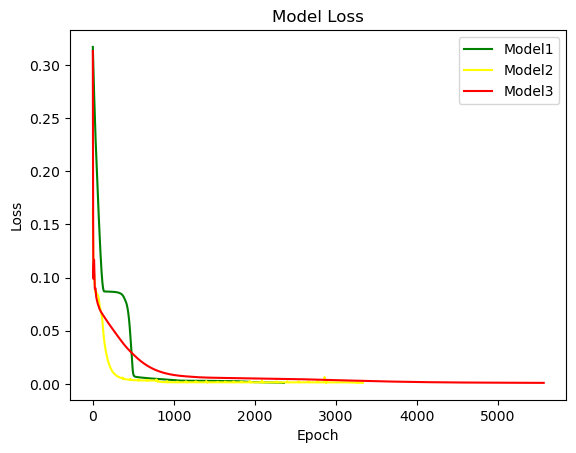

In [148]:
#Plotting the loss functions vs epochs

plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "yellow")
plt.plot(Model3epoch_array,Model3loss_array, color = "red")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch.png')
plt.show()

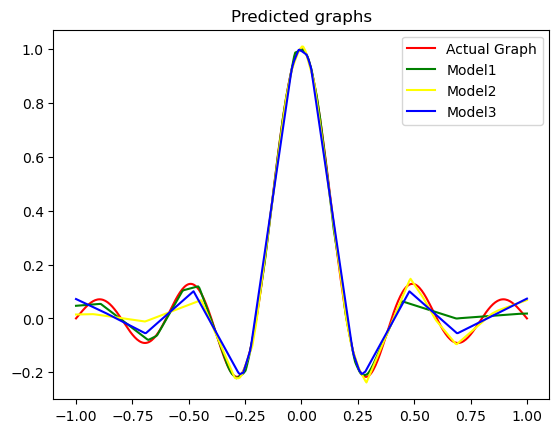

In [149]:
#Plotting the prediction

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graphs
plt.plot(x,Model1prediction.data.numpy(),color="green")
plt.plot(x,Model2prediction.data.numpy(),color="yellow")
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Predicted graphs')
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.savefig('Predicted Graphs.png')
plt.show()